# Cell 1: Title and description

# AI4I 2020 — Faults & Physics Feature Report

This notebook loads `ai4i2020_features.csv` and provides an exploratory visualization report focused on failure types and the physics-derived features (`Power_W`, `Temp_Diff_K`, `Strain_Load`).


In [40]:
# Cell 2: Imports and load data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

DATA_PATH = 'ai4i2020_features.csv'
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f'{DATA_PATH} not found in notebook directory')

# Load dataframe
df = pd.read_csv(DATA_PATH)
print('Loaded', DATA_PATH, 'with shape', df.shape)

df.head()

Loaded ai4i2020_features.csv with shape (10000, 17)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Power_W,Temp_Diff_K,Strain_Load
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,6951.590560,10.5,0.0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,6826.722724,10.5,138.9
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,7749.387543,10.4,247.0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,5927.504659,10.4,276.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,5897.816608,10.5,360.0


In [41]:
# Cell 3: Build Failure_Type column (mark ambiguous as 'NoLabel')
failure_cols = ['TWF','HDF','PWF','OSF','RNF']
for c in failure_cols:
    if c not in df.columns:
        df[c] = 0

# create sum and label only rows with at least one subtype flag
df['sum_failures'] = df[failure_cols].sum(axis=1)
mask_labeled = df['sum_failures'] > 0
# idxmax will pick first column when multiple; for unlabeled rows we set 'NoLabel'
df['Failure_Type_raw'] = df[failure_cols].idxmax(axis=1).where(mask_labeled, other='NoLabel')
df['Failure_Type'] = df['Failure_Type_raw'].astype(str)

# show distribution
counts = df['Failure_Type'].value_counts(dropna=False)
print('Failure type distribution (including NoLabel):')
print(counts)

counts

Failure type distribution (including NoLabel):
Failure_Type
NoLabel    9652
HDF         115
PWF          91
OSF          78
TWF          46
RNF          18
Name: count, dtype: int64


Failure_Type
NoLabel    9652
HDF         115
PWF          91
OSF          78
TWF          46
RNF          18
Name: count, dtype: int64

C:\Users\advay\AppData\Local\Temp\ipykernel_28800\2879265901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Failure_Type', order=order, palette='tab10')


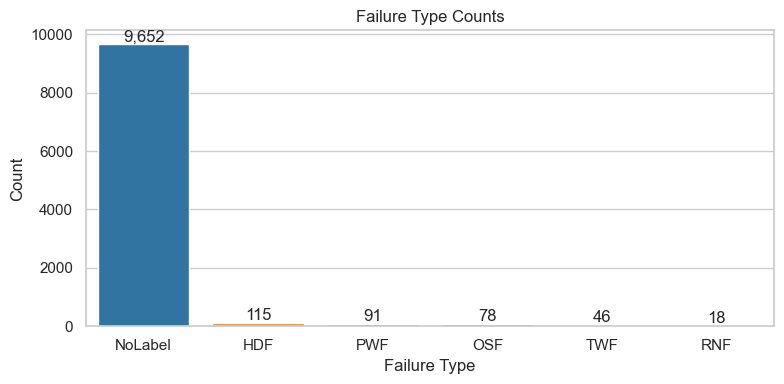

In [42]:
# Cell 4: Bar plot of failure types
plt.figure(figsize=(8,4))
order = df['Failure_Type'].value_counts().index
ax = sns.countplot(data=df, x='Failure_Type', order=order, palette='tab10')
plt.title('Failure Type Counts')
plt.xlabel('Failure Type')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ','), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.show()

C:\Users\advay\AppData\Local\Temp\ipykernel_28800\1752802117.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Failure_Type']!='NoLabel'], x='Failure_Type', y=feat, palette='Set2')
C:\Users\advay\AppData\Local\Temp\ipykernel_28800\1752802117.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Failure_Type']!='NoLabel'], x='Failure_Type', y=feat, palette='Set2')
C:\Users\advay\AppData\Local\Temp\ipykernel_28800\1752802117.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Failure_Type']!='NoLabel'], x

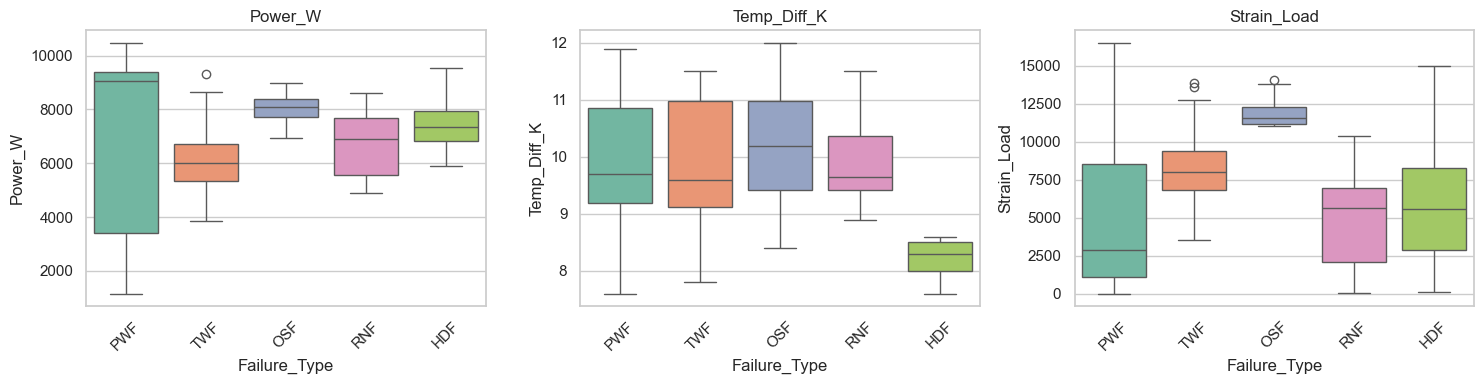

In [43]:
# Cell 5: Boxplots for physics-derived features by Failure_Type
physics = ['Power_W','Temp_Diff_K','Strain_Load']
for c in physics:
    if c not in df.columns:
        df[c] = np.nan

plt.figure(figsize=(15,4))
for i, feat in enumerate(physics, 1):
    plt.subplot(1, len(physics), i)
    sns.boxplot(data=df[df['Failure_Type']!='NoLabel'], x='Failure_Type', y=feat, palette='Set2')
    plt.title(feat)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

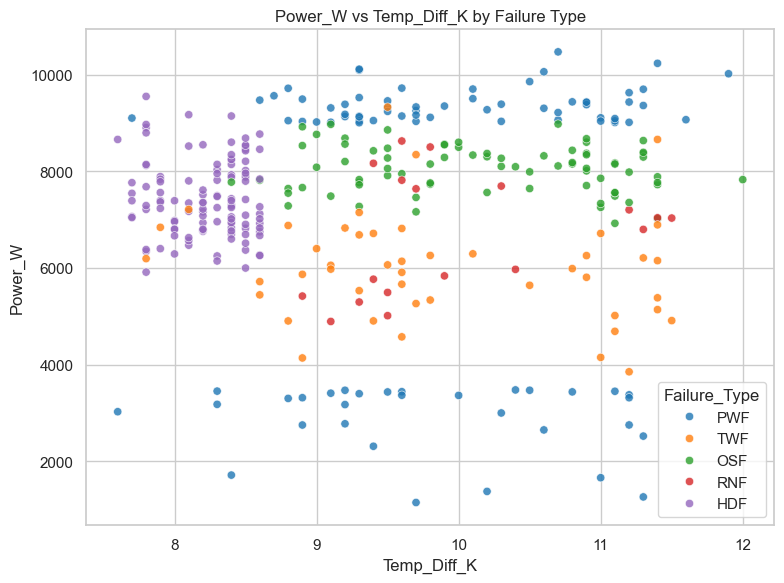

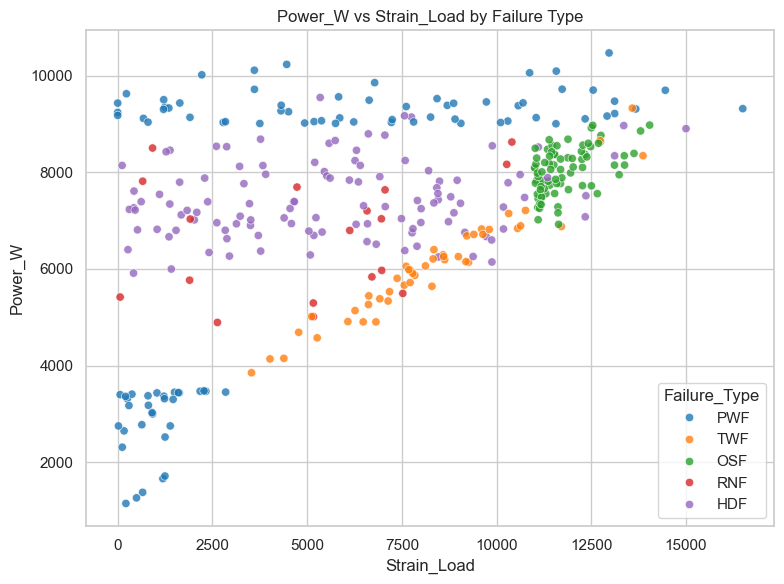

In [44]:
# Cell 6: Scatter plots to show interactions
plt.figure(figsize=(8,6))
sns.scatterplot(data=df[df['Failure_Type']!='NoLabel'], x='Temp_Diff_K', y='Power_W', hue='Failure_Type', palette='tab10', alpha=0.8)
plt.title('Power_W vs Temp_Diff_K by Failure Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df[df['Failure_Type']!='NoLabel'], x='Strain_Load', y='Power_W', hue='Failure_Type', palette='tab10', alpha=0.8)
plt.title('Power_W vs Strain_Load by Failure Type')
plt.tight_layout()
plt.show()

In [45]:
# Cell 7: Summary statistics (count, mean, std) per failure type for physics features
grp = df[df['Failure_Type']!='NoLabel'].groupby('Failure_Type')[physics].agg(['count','mean','std']).round(3)
grp

Power_W                     Temp_Diff_K                 \
               count      mean       std       count    mean    std   
Failure_Type                                                          
HDF              115  7433.168   776.910         115   8.228  0.282   
OSF               78  8043.054   476.246          78  10.183  0.891   
PWF               91  7161.909  3124.128          91   9.942  0.970   
RNF               18  6677.857  1237.108          18   9.989  0.832   
TWF               46  6019.326  1103.932          46   9.867  1.058   

             Strain_Load                       
                   count       mean       std  
Failure_Type                                   
HDF                  115   5702.377  3437.083  
OSF                   78  11794.240   743.629  
PWF                   91   4862.949  4556.326  
RNF                   18   5097.022  3129.677  
TWF                   46   8188.770  2294.182

## Findings & Next Steps

- The plots above summarize how the physics-derived features vary across failure types.
- Use the boxplots and scatter plots to identify which features separate failure classes (e.g., large `Power_W` and `Temp_Diff_K` differences).
- Next steps: compute statistical tests (ANOVA/Kruskal-Wallis) for each physics feature across failure types, compute effect sizes, and produce SHAP explanations from the trained Sentry/Specialist to quantify feature contributions at the sample level.


### PWF (Power Failure) — Deep Dive

This section inspects rows labeled `PWF` to identify characteristic/expected ranges of key features.


In [47]:
# PWF Cell 1: counts and basic descriptives
pwf = df[df['Failure_Type']=='PWF'].copy()
others = df[df['Failure_Type']!='PWF'].copy()
print('PWF rows:', len(pwf), 'Total rows:', len(df), f'({len(pwf)/len(df):.2%})')

# Features of interest
features = ['Power_W','Temp_Diff_K','Strain_Load','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Type_encoded']
for f in features:
    if f not in df.columns:
        df[f] = np.nan

# Descriptive stats for PWF
pwf_stats = pwf[features].describe().T
pwf_stats['50%'] = pwf_stats['50%'].astype(float)
print('\nDescriptive statistics for PWF (physics & key features):')
pwf_stats[['count','mean','std','50%','min','max']]


PWF rows: 91 Total rows: 10000 (0.91%)

Descriptive statistics for PWF (physics & key features):


,count,mean,std,50%,min,max
Power_W,91.0,7161.909486,3124.127782,9066.793478,1148.44061,10469.923005
Temp_Diff_K,91.0,9.941758,0.969544,9.700000,7.60000,11.900000
Strain_Load,91.0,4862.949451,4556.326233,2849.500000,0.00000,16497.000000
Rotational speed [rpm],91.0,1783.296703,627.308386,1402.000000,1200.00000,2886.000000
Torque [Nm],91.0,47.698901,27.082908,62.900000,3.80000,76.600000
Tool wear [min],91.0,100.725275,64.740862,98.000000,0.00000,234.000000
Type_encoded,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# PWF Cell 2: Percentiles and comparison to others
percentiles = [0.1,0.25,0.5,0.75,0.9]
pwf_pct = pwf[features].quantile(percentiles).T
all_pct = df[features].quantile(percentiles).T

compare = pd.concat([pwf_pct.add_prefix('PWF_q_'), all_pct.add_prefix('ALL_q_')], axis=1)
print('Percentiles (PWF vs ALL) for selected features:')
compare.round(2)


In [ ]:
# PWF Cell 3: Cohen's d (effect size) between PWF and others for each feature
from math import sqrt

def cohens_d(a, b):
    # a, b are arrays
    na, nb = len(a), len(b)
    sa, sb = np.nanstd(a, ddof=1), np.nanstd(b, ddof=1)
    if na+nb-2 <= 0:
        return np.nan
    pooled = sqrt(((na-1)*sa*sa + (nb-1)*sb*sb) / (na+nb-2)) if (na+nb-2)>0 else np.nan
    if pooled == 0 or np.isnan(pooled):
        return np.nan
    return (np.nanmean(a) - np.nanmean(b)) / pooled

es = {}
for f in features:
    es[f] = cohens_d(pwf[f].dropna().values, others[f].dropna().values)

es_df = pd.Series(es, name='cohens_d').to_frame()
es_df['abs_d'] = es_df['cohens_d'].abs()
es_df.sort_values('abs_d', ascending=False)


In [ ]:
# PWF Cell 4: Violin plots comparing PWF vs others for key features
plt.figure(figsize=(15,4))
for i, feat in enumerate(features[:5], 1):
    plt.subplot(1, 5, i)
    sns.violinplot(data=df[df['Failure_Type'].isin(['PWF','NoLabel'])==False], x='Failure_Type', y=feat, inner='quartile', palette='Set2')
    plt.title(feat)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Focused violin: PWF vs ALL (binary)
plt.figure(figsize=(12,4))
for i, feat in enumerate(['Power_W','Rotational speed [rpm]','Torque [Nm]'], 1):
    plt.subplot(1, 3, i)
    sns.violinplot(data=df[df['Failure_Type']!='NoLabel'], x=df['Failure_Type']== 'PWF', y=feat, inner='quartile', palette=['#b3cde3','#fbb4ae'])
    plt.xlabel('Is PWF')
    plt.title(feat)
plt.tight_layout()
plt.show()


In [ ]:
# PWF Cell 5: Simple decision-tree to extract human-readable rules for PWF
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import cross_val_score

# Prepare binary target (PWF vs not PWF), drop NoLabel rows to focus on labeled data
df_labeled = df[df['Failure_Type']!='NoLabel'].copy()
X = df_labeled[features].fillna(0)
y = (df_labeled['Failure_Type']=='PWF').astype(int)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

print('Decision tree rules (depth=2):')
print(export_text(clf, feature_names=list(X.columns)))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1')
print('\nCross-validated F1 (PWF as positive):', scores.mean())


In [ ]:
# PWF Cell 6: Percentile thresholds and proportion of PWF above thresholds
overall_75 = df[features].quantile(0.75)
summary_thresh = []
for f in ['Power_W','Rotational speed [rpm]','Torque [Nm]']:
    thr = overall_75[f]
    prop_pwf = (pwf[f] > thr).mean()
    prop_all = (df[f] > thr).mean()
    summary_thresh.append({'feature': f, '75th_all': thr, 'prop_pwf_above': prop_pwf, 'prop_all_above': prop_all})

pd.DataFrame(summary_thresh).round(3)


## PWF — Key Findings

- The decision-tree rules above provide a compact, interpretable approximation of characteristic ranges that separate PWF from other failures.
- Percentile analysis and the `prop_pwf_above` table show how often PWF rows are above the overall 75th percentile for key features like `Power_W` and `Rotational speed [rpm]`.
- Use the summary stats and violin plots to pick demo threshold values for dashboard examples (e.g., Power_W > X, Rotational speed > Y, Torque > Z).

Next steps:

- If you want, I can pick 3 representative PWF example rows (median, high-power, and borderline) and add them to the dashboard demo CSV generator.
- Or I can compute SHAP attributions for PWF samples to quantify per-sample feature contributions.
